In [130]:
# Import libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

The `2_QTS_PERSONS` table contains 20,202 rows of survey data for as many respondents. What follows is an investigation of candidate variables that will act as inputs into both the class identification and choice modelling performed later in the analysis.

In [131]:
# Import file
filepath = './Access_Tables/'
filename = '2_QTS_PERSONS.pyobj'
df_persons = pd.read_pickle(filepath + filename)

df_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20202 entries, 0 to 20201
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   HHID              20202 non-null  int16         
 1   PERSID            20202 non-null  object        
 2   AGEGROUP          17724 non-null  float64       
 3   SEX               17762 non-null  object        
 4   RELATIONSHIP      10917 non-null  object        
 5   CARLICENCE        20202 non-null  bool          
 6   CARLICTYPE        11830 non-null  object        
 7   MBLICENCE         20202 non-null  bool          
 8   MBLICTYPE         984 non-null    object        
 9   OTHERLICENCE      20202 non-null  bool          
 10  WORKSTATUS        14008 non-null  object        
 11  ANZSCO_1-digit    8094 non-null   Int64         
 12  ANZSCO_3-digit    8094 non-null   Int64         
 13  INDUSTRY          8854 non-null   object        
 14  STUDYING          4359

In [132]:
def plot_histogram(data, bins, figure_size, title, xlabel, ylabel, x_axis_rot=0):
    # Plot histogram
    fig, ax = plt.subplots(figsize=figure_size)
    bins = np.arange(bins) - 0.5
    ax.hist(data, align = 'mid', bins = bins, alpha = 0.8)
    plt.xticks(rotation=x_axis_rot)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show

    # Plot counts
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

### Explore Respondents' Ages
The `2_QTS_PERSONS` tables contains an age group column that is informed by a reference table `RP_AGE_GROUP`. Joining this will provide the group that can be further explored. The exact age of a person does not appear to be recorded. From the histogram below, it appears there are some missing values from respondents, 2478, about 12%. 

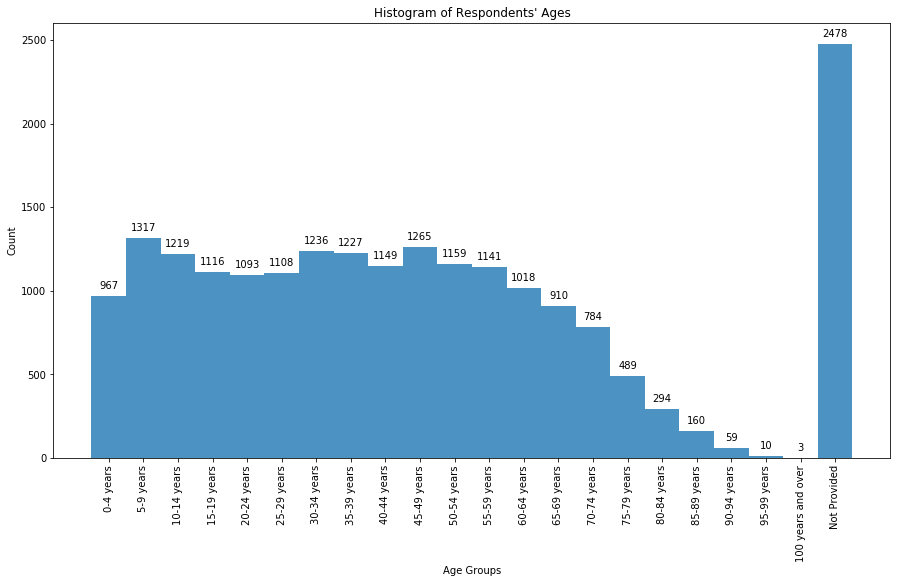

In [133]:
# Load age groups reference table
df_age_group = pd.read_pickle(filepath + 'RP_AGE_GROUP.pyobj')
df_age_group.head()

# Fix float for age group code
df_age_group['AGEGROUP_CODE'] = pd.to_numeric(df_age_group['AGEGROUP_CODE'], downcast = 'integer')
# Export to make change stick
df_age_group.to_pickle(filepath + 'RP_AGE_GROUP.pyobj')

# Just bring back unique values for AGE_GROUP_CODE and DESCRIPTION
df_age_group = df_age_group.drop_duplicates(subset = ['AGEGROUP_CODE', 'DESCRIPTION']).loc[:, 'AGEGROUP_CODE':'DESCRIPTION']

# Create plot data, just the age group description
age_plot = pd.merge(df_persons, df_age_group, left_on = 'AGEGROUP', right_on = "AGEGROUP_CODE", how = 'left').sort_values(by = 'AGEGROUP_CODE')

plot_histogram(age_plot['DESCRIPTION'].fillna('Not Provided'), 23, (15,8), 
               'Histogram of Respondents\' Ages', 'Age Groups', 'Count', 90)

In [134]:
filename = '5_QTS_TRIPS.pyobj'
df_trips = pd.read_pickle(filepath + filename)

In [135]:
df_trips = df_trips[['TRIPID', 'HHID', 'PERSID', 'MAINMODE', 'TRAVTIME', 'OVERALL_PURPOSE']]
df_persons = df_persons[['HHID', 'PERSID', 'AGEGROUP', 'SEX']]

In [136]:
df_person_trips = df_trips.merge(right = df_persons, how = 'left', on = 'PERSID')

In [137]:
df_person_trips = df_person_trips.drop('HHID_y', axis=1)

In [138]:
df_person_trips = df_person_trips.dropna()

In [139]:
mode_sex_counts = df_person_trips[['MAINMODE', 'SEX', 'HHID_x']].groupby(by=['MAINMODE', 'SEX']).count()

In [140]:
counts = mode_sex_counts['HHID_x'].tolist()
female_counts = []
male_counts = []
for i in range(len(counts)):
    if i%2 == 0:
        female_counts.append(counts[i])
    else:
        male_counts.append(counts[i])

In [141]:
count_labels = mode_sex_counts.reset_index()['MAINMODE'].tolist()

In [142]:
for i in range(len(count_labels)):
    if i%2 == 0:
        del count_labels[i]

IndexError: list assignment index out of range

count_labels

TypeError: arange() missing required argument 'start' (pos 1)

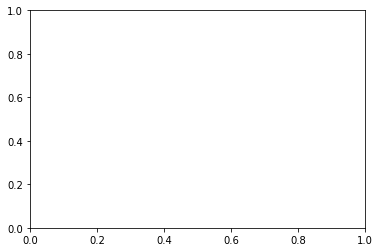

In [143]:
fig, ax = plt.subplots()

x = np.arange()
counts_f = ax.bar(female_counts, width = 0.35, label = 'F')

### Explore Respondents' Sexes
The balance of the sex of respondents is quite similar at 8,953 (44.3%) for females and 8809 (43.6%) for males. Sex information wasn't recorded for 2440 (12.1%) of the respondents.

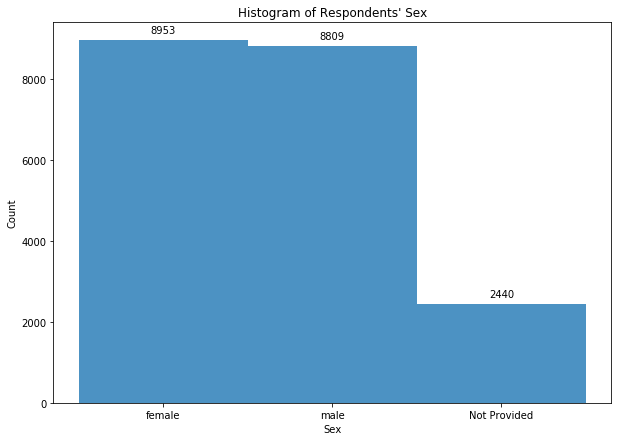

In [144]:
# Create plot data, just the age group description
sex_plot = df_persons['SEX'].fillna('Not Provided')

# Plot histogram of age groups
plot_histogram(sex_plot, sex_plot.nunique() + 1, (10,7), 'Histogram of Respondents\' Sex', 'Sex', 'Count')

In [145]:
# Import file
filepath = './Access_Tables/'
#1
filename = '1_QTS_HOUSEHOLDS.pyobj'
df_households = pd.read_pickle(filepath + filename)

#2
filename = 'R_ASGS_2016.pyobj'
df_asgs = pd.read_pickle(filepath + filename)

print(df_households.info())
print(df_asgs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10094 entries, 0 to 10093
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HHID           10094 non-null  float64
 1   STATUS         10094 non-null  object 
 2   HHSIZE         7724 non-null   float64
 3   BIKES          7573 non-null   float64
 4   HHVEH          6740 non-null   float64
 5   DWELLTYPE      10094 non-null  object 
 6   REFUSEAGE      2354 non-null   object 
 7   REFUSESEX      2357 non-null   object 
 8   REFUSESIZE     2354 non-null   object 
 9   REFUSEVEH      2354 non-null   object 
 10  SURVEYWEEK     10094 non-null  int64  
 11  STRATA_LGA     10094 non-null  int64  
 12  TRAVDATE       10094 non-null  int64  
 13  TRAVMONTH      10094 non-null  int64  
 14  TRAVYEAR       10094 non-null  int64  
 15  TRAVDOW        10094 non-null  int64  
 16  HOME_SA1_2016  10094 non-null  int64  
 17  HHWGT_17       5448 non-null   float64
dtypes: flo

In [146]:
filename = 'df_person_trips.pyobj'
df_person_trips = pd.read_pickle(filepath + filename)

In [147]:
df_person_trips

,TRIPID,HHID,PERSID,MAINMODE,TRAVTIME,OVERALL_PURPOSE,MODE_CODE,AGEGROUP,SEX,PURPOSE_CODE
0,371000001,37,37/1000,Car driver,20.0,Pickup/Dropoff Someone,0,11,1,5
1,371000002,37,37/1000,Car driver,25.0,Pickup/Dropoff Someone,0,11,1,5
2,371000003,37,37/1000,Car driver,5.0,Shopping,0,11,1,7
3,371000004,37,37/1000,Car driver,5.0,Shopping,0,11,1,7
4,371002001,37,37/1002,Car passenger,20.0,Education,1,4,0,2
...,...,...,...,...,...,...,...,...,...,...
38311,148261002001,14826,14826/1002,Light rail,60.0,Education,2,5,1,2
38312,148261002006,14826,14826/1002,Light rail,60.0,Education,2,5,1,2
38313,5321002005,532,532/1002,Public bus,93.0,Shopping,2,4,1,7
38314,31521004006,3152,3152/1004,Public bus,95.0,Education,2,3,1,2


In [148]:
df_person_trips.loc[df_person_trips['MAINMODE'] == 'Public Bus', 'MAINMODE'] = 'Public bus'


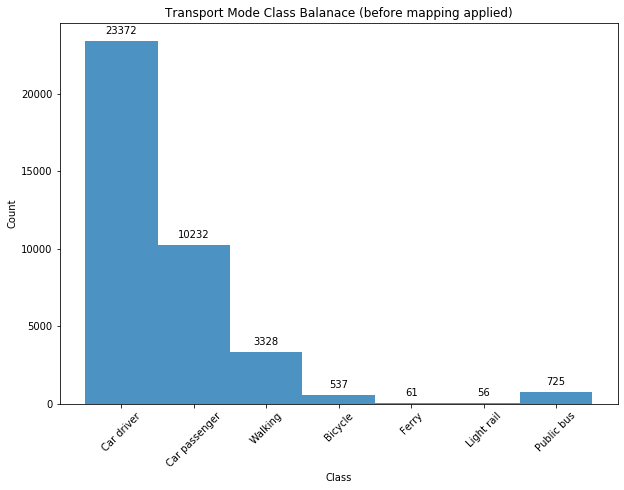

In [149]:
# Create plot data, just the age group description
class_plot = df_person_trips['MAINMODE'].astype(str)

# Plot histogram of age groups
plot_histogram(class_plot, df_person_trips['MAINMODE'].nunique() + 1, (10,7), 'Transport Mode Class Balanace (before mapping applied)', 'Class', 'Count', 45)

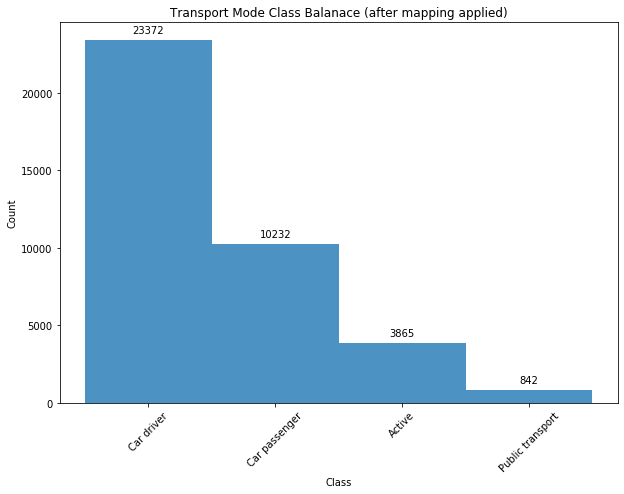

In [152]:
# Create plot data, just the age group description

df_person_trips.loc[df_person_trips['MODE_CODE'] == 0, 'MODE'] = 'Car driver'
df_person_trips.loc[df_person_trips['MODE_CODE'] == 1, 'MODE'] = 'Car passenger'
df_person_trips.loc[df_person_trips['MODE_CODE'] == 2, 'MODE'] = 'Public transport'
df_person_trips.loc[df_person_trips['MODE_CODE'] == 3, 'MODE'] = 'Active'

class_plot = df_person_trips['MODE'].astype(str)

#df_trips_reduced.loc[df_trips_reduced['MAINMODE'] == 'Bicycle', 'MODE_CODE'] = 3

#df_person_trips.loc[df_person_trips['OVERALL_PURPOSE'] == 'Pickup/Deliver Something', 'PURPOSE_CODE'] = 5

# Plot histogram of age groups
plot_histogram(class_plot, df_person_trips['MODE'].nunique() + 1, (10,7), 'Transport Mode Class Balanace (after mapping applied)', 'Class', 'Count', 45)

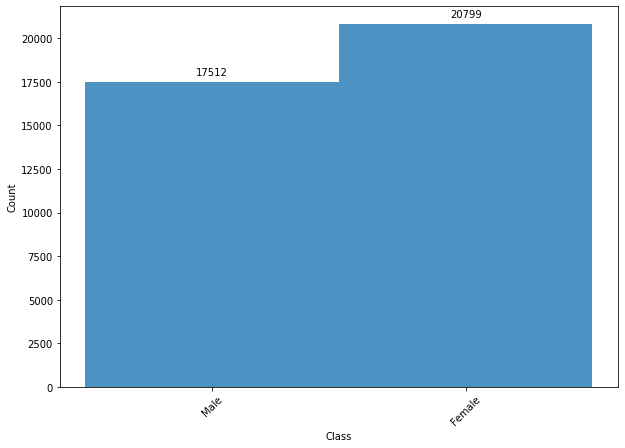

In [160]:
sex_class_plot = df_person_trips['SEX'].astype(str)

df_person_trips.loc[df_person_trips['SEX'] == 0, 'SEX'] = 'Female'
df_person_trips.loc[df_person_trips['SEX'] == 1, 'SEX'] = 'Male'

#df_person_trips.loc[df_person_trips['OVERALL_PURPOSE'] == 'Pickup/Deliver Something', 'PURPOSE_CODE'] = 5

# Plot histogram of age groups
plot_histogram(sex_class_plot, df_person_trips['SEX'].nunique() + 1, (10,7), '', 'Class', 'Count', 45)

In [162]:
age_plot = pd.merge(df_person_trips, df_age_group, left_on = 'AGEGROUP', right_on = "AGEGROUP_CODE", how = 'left').sort_values(by = 'AGEGROUP_CODE')

In [166]:
age_plot

,TRIPID,HHID,PERSID,MAINMODE,TRAVTIME,OVERALL_PURPOSE,MODE_CODE,AGEGROUP,SEX,PURPOSE_CODE,MODE,AGEGROUP_CODE,DESCRIPTION
12547,53051003005,5305,5305/1003,Car passenger,5.0,Accompany Someone,1,1,Male,0,Car passenger,1,0-4 years
30616,121361002003,12136,12136/1002,Car passenger,15.0,Accompany Someone,1,1,Female,0,Car passenger,1,0-4 years
30617,121361002004,12136,12136/1002,Car passenger,10.0,Accompany Someone,1,1,Female,0,Car passenger,1,0-4 years
30618,121361002005,12136,12136/1002,Car passenger,10.0,Accompany Someone,1,1,Female,0,Car passenger,1,0-4 years
15140,62261003001,6226,6226/1003,Car passenger,5.0,Accompany Someone,1,1,Female,0,Car passenger,1,0-4 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29065,115291000002,11529,11529/1000,Car driver,10.0,Social,0,20,Male,8,Car driver,20,95-99 years
16273,66931001002,6693,6693/1001,Walking,10.0,Shopping,3,20,Female,7,Active,20,95-99 years
25620,97921000003,9792,9792/1000,Car passenger,10.0,Shopping,1,21,Female,7,Car passenger,21,100 years and over
25619,97921000002,9792,9792/1000,Walking,5.0,Shopping,3,21,Female,7,Active,21,100 years and over


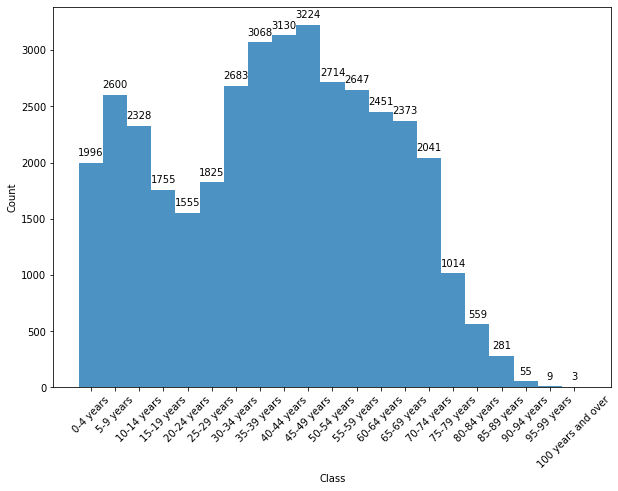

In [173]:
plot_histogram(age_plot['DESCRIPTION'], age_plot['DESCRIPTION'].nunique() + 1, (10,7), '', 'Class', 'Count', 45)

In [194]:
df_person_trips.loc[df_person_trips['PURPOSE_CODE'] == 0, 'PURPOSE'] = 'Accompany Someone'
df_person_trips.loc[df_person_trips['PURPOSE_CODE'] == 1, 'PURPOSE'] = 'Work'
df_person_trips.loc[df_person_trips['PURPOSE_CODE'] == 2, 'PURPOSE'] = 'Education'
df_person_trips.loc[df_person_trips['PURPOSE_CODE'] == 3, 'PURPOSE'] = 'Other Purpose'
df_person_trips.loc[df_person_trips['PURPOSE_CODE'] == 4, 'PURPOSE'] = 'Personal Business'
df_person_trips.loc[df_person_trips['PURPOSE_CODE'] == 5, 'PURPOSE'] = 'Pickup/Dropoff'
#df_person_trips.loc[df_person_trips['PURPOSE_CODE'] == 5, 'PURPOSE'] = 'Pickup/Dropoff'
df_person_trips.loc[df_person_trips['PURPOSE_CODE'] == 6, 'PURPOSE'] = 'Recreation'
df_person_trips.loc[df_person_trips['PURPOSE_CODE'] == 7, 'PURPOSE'] = 'Shopping'
df_person_trips.loc[df_person_trips['PURPOSE_CODE'] == 8, 'PURPOSE'] = 'Social'
#df_person_trips.loc[df_person_trips['PURPOSE_CODE'] == 1, 'PURPOSE'] = 'Work'

In [195]:
df_person_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38311 entries, 0 to 38315
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRIPID           38311 non-null  int64  
 1   HHID             38311 non-null  int16  
 2   PERSID           38311 non-null  object 
 3   MAINMODE         38311 non-null  object 
 4   TRAVTIME         38311 non-null  float32
 5   OVERALL_PURPOSE  38311 non-null  object 
 6   MODE_CODE        38311 non-null  int8   
 7   AGEGROUP         38311 non-null  int8   
 8   SEX              38311 non-null  object 
 9   PURPOSE_CODE     38311 non-null  int8   
 10  MODE             38311 non-null  object 
 11  PURPOSE          38311 non-null  object 
dtypes: float32(1), int16(1), int64(1), int8(3), object(6)
memory usage: 2.7+ MB


In [196]:
df_person_trips['PURPOSE'].unique()

array(['Pickup/Dropoff', 'Shopping', 'Education', 'Work', 'Recreation',
       'Accompany Someone', 'Personal Business', 'Social',
       'Other Purpose'], dtype=object)

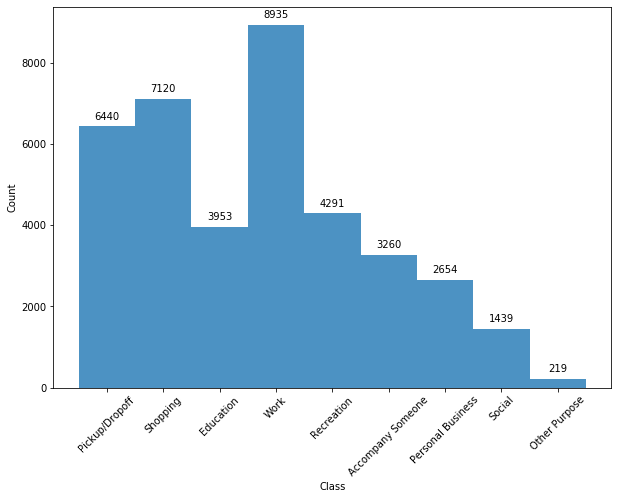

In [198]:
plot_histogram(df_person_trips['PURPOSE'], df_person_trips['PURPOSE'].nunique() + 1, (10,7), '', 'Class', 'Count', 45)

<function matplotlib.pyplot.show(*args, **kw)>

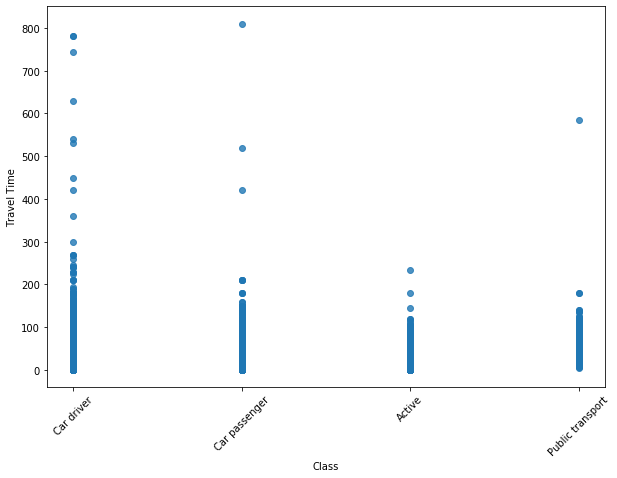

In [202]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(df_person_trips['MODE'], df_person_trips['TRAVTIME'], alpha = 0.8)
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Travel Time')
#plt.title(title)
plt.show

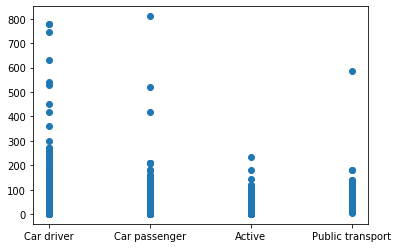

In [200]:
plt.scatter( df_person_trips['MODE'], df_person_trips['TRAVTIME'])

<function matplotlib.pyplot.show(*args, **kw)>

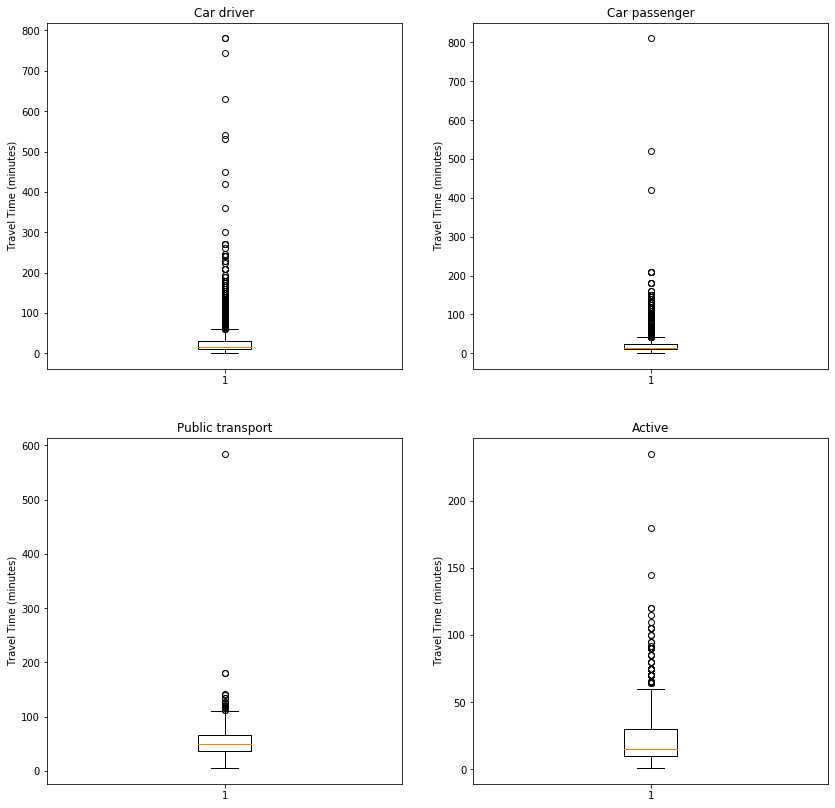

In [231]:
fig = plt.figure(figsize=[14, 14])
ax = fig.add_subplot(2, 2, 1)
data = df_person_trips[df_person_trips['MODE_CODE']==0]
ax.boxplot(data['TRAVTIME'])
#plt.xlabel('Class')
plt.ylabel('Travel Time (minutes)')
plt.title('Car driver')

ax = fig.add_subplot(2, 2, 2)
data = df_person_trips[df_person_trips['MODE_CODE']==1]
ax.boxplot(data['TRAVTIME'])
#plt.xlabel('Class')
plt.ylabel('Travel Time (minutes)')
plt.title('Car passenger')

ax = fig.add_subplot(2, 2, 3)
data = df_person_trips[df_person_trips['MODE_CODE']==2]
ax.boxplot(data['TRAVTIME'])
#plt.xlabel('Class')
plt.ylabel('Travel Time (minutes)')
plt.title('Public transport')

ax = fig.add_subplot(2, 2, 4)
data = df_person_trips[df_person_trips['MODE_CODE']==3]
ax.boxplot(data['TRAVTIME'])
#plt.xlabel('Class')
plt.ylabel('Travel Time (minutes)')
plt.title('Active')
plt.show

In [219]:
data

,TRIPID,HHID,PERSID,MAINMODE,TRAVTIME,OVERALL_PURPOSE,MODE_CODE,AGEGROUP,SEX,PURPOSE_CODE,MODE,PURPOSE
0,371000001,37,37/1000,Car driver,20.0,Pickup/Dropoff Someone,0,11,Male,5,Car driver,Pickup/Dropoff
1,371000002,37,37/1000,Car driver,25.0,Pickup/Dropoff Someone,0,11,Male,5,Car driver,Pickup/Dropoff
2,371000003,37,37/1000,Car driver,5.0,Shopping,0,11,Male,7,Car driver,Shopping
3,371000004,37,37/1000,Car driver,5.0,Shopping,0,11,Male,7,Car driver,Shopping
14,421000003,42,42/1000,Car driver,10.0,Shopping,0,9,Female,7,Car driver,Shopping
...,...,...,...,...,...,...,...,...,...,...,...,...
37487,146031000003,14603,14603/1000,Car driver,25.0,Pickup/Dropoff Someone,0,7,Male,5,Car driver,Pickup/Dropoff
37489,147441000003,14744,14744/1000,Car driver,60.0,Work Related,0,12,Female,1,Car driver,Work
37490,147441000007,14744,14744/1000,Car driver,55.0,Direct Work Commute,0,12,Female,1,Car driver,Work
37821,76471000006,7647,7647/1000,Car driver,45.0,Recreation,0,7,Male,6,Car driver,Recreation
